In [54]:
import numpy as np
from simple_linear_regr_utils import generate_data, evaluate
import pandas as pd

class SimpleLinearRegression:
    def __init__(self, iterations=1500, lr=0.3):
        self.iterations = iterations # number of iterations the fit method will be called
        self.lr = lr # The learning rate
        self.losses = [] # A list to hold the history of the calculated losses
        self.W, self.b = None, None # the slope and the intercept of the model

        
    def __loss(self, y, y_hat):
        #calculate the loss. use the sum of squared error formula for simplicity
        #MSE: https://en.wikipedia.org/wiki/Mean_squared_error
        loss = None    
        
        sum = 0
        n = len(y)

        for i in range(0, n):        
            squared_diff = (y[i]-y_hat[i])**2
            sum = sum + squared_diff

        mse = sum/n
        loss = mse

        self.losses.append(loss)
    
        return loss


    def __init_weights(self, X):
        """

        :param X: The training set
        """
        weights = np.random.normal(size=X.shape[1] + 1)
        self.W = weights[:X.shape[1]].reshape(-1, X.shape[1])
        self.b = weights[-1]
        
        print("init shape\nself.W: ", self.W.shape)
        print("self.b ", self.b.shape)

        
    def __sgd(self, X, y, y_hat, k=10): 
        """
        :param X: The training set
        :param y: The actual output on the training set
        :param y_hat: The predicted output on the training set
        :return:
            sets updated W and b to the instance Object (self)
        """
        #combine x and y to sample k data points e.g. k=10 || 422,1 -> 10,1
        #todo: sampling x and y separate with seed
        train_data=pd.DataFrame(X)
        train_data['target']=y
        train_data.head(3)        
        temp=train_data.sample(k)
        
        y_k=np.array(temp['target'])
        x_k=np.array(temp.drop('target',axis=1))
        
        dW = np.zeros(shape=(1,1))        
        db = 0
        
        # Calculating gradients for k points
        for i in range(k):
            y_hat_k = self.predict(x_k[i])

            dW = dW + (-2)*x_k[i]*(y_k[i]-y_hat_k)
            db = db + (-2)*(y_k[i]-y_hat_k)

        #  ToDO update the self.W and self.b using the learning rate and the values for dW and db
        # Updating W,b each iteration
        self.W = self.W - self.lr * (dW/k)
        self.b = self.b - self.lr * (db/k)
        
        
    def fit(self, X, y):
        """
        :param X: The training set
        :param y: The true output of the training set
        :return:
        """
        self.__init_weights(X)
        y_hat = self.predict(X)
        loss = self.__loss(y, y_hat)
        print(f"Initial Loss: {loss}")
        
        for i in range(self.iterations + 1):
            
            self.__sgd(X, y, y_hat) ## Updates self.W, self.b   
            
            y_hat = self.predict(X)            
            loss = self.__loss(y, y_hat)
            
            if not i % 5000:
                print(f"Iteration {i}, Loss: {loss}")

                
                
    def predict(self, X):
        """
        :param X: The training dataset
        :return:
            y_hat: the predicted output
        """
        y_hat = np.dot(X,self.W) + self.b
        
        return y_hat


array([], shape=(0, 0), dtype=float64)

# Training Samples: 422; # Test samples: 20;
init shape
self.W:  (1, 1)
self.b  ()
Initial Loss: [29081.6035604]
Iteration 0, Loss: [28154.45386936]
Iteration 10000, Loss: [4760.23918135]
Iteration 20000, Loss: [4283.95476497]
Iteration 30000, Loss: [4090.77777663]
Iteration 40000, Loss: [4008.90821886]
Iteration 50000, Loss: [3977.64946938]
Iteration 60000, Loss: [3965.43224472]
Slope: [[888.01404773]]; Intercept: [155.13543573]
Mean squared error: 2693.97
Coefficient of determination: 0.44


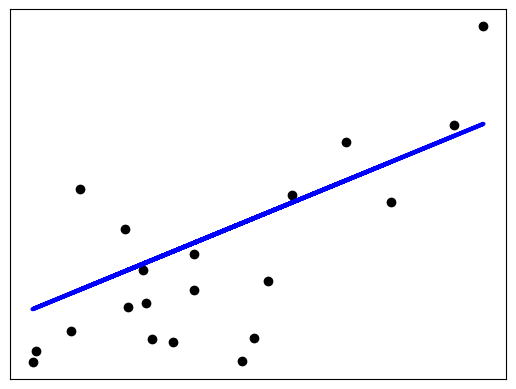

****** Success ******


In [55]:
X_train, y_train, X_test, y_test = generate_data()
model = SimpleLinearRegression()

model.iterations = 65000
model.lr=0.01

model.fit(X_train,y_train)

predicted = model.predict(X_test)
evaluate(model, X_test, y_test, predicted)

In [52]:
# save params

import pickle

res = True
try:
    with open('file_w.pickle', 'wb') as handle:
        pickle.dump(model.W, handle, protocol=pickle.HIGHEST_PROTOCOL)

    with open('file_b.pickle', 'wb') as handle:
        pickle.dump(model.b, handle, protocol=pickle.HIGHEST_PROTOCOL)

except Exception as err:
    res = False
    
res

True